In [3]:
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')

In [21]:
from fugue_notebook import setup
from fugue_sql import fsql
import fugue_spark
setup ()
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

<IPython.core.display.Javascript object>

In [22]:
df = pd.read_csv('./data/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [24]:
query = """
SELECT 
    Sex,
    COUNT(*) AS num_athletes
FROM df
WHERE Season = 'Winter'
GROUP BY Sex
"""
pysqldf(query)

,Sex,num_athletes
0,F,15079
1,M,33485


In [27]:
query = """
SELECT 
    Sex,
    Sport,
    COUNT(*) AS num_athletes
FROM df
WHERE Season = 'Winter'
GROUP BY 
    Sex,
    Sport
ORDER BY Sport, num_athletes DESC
"""
pysqldf(query)

,Sex,Sport,num_athletes
0,M,Alpine Skiing,5431
1,F,Alpine Skiing,3398
2,M,Alpinism,21
3,M,Biathlon,3030
4,F,Biathlon,1863
5,M,Bobsleigh,2915
6,F,Bobsleigh,143
7,M,Cross Country Skiing,5748
8,F,Cross Country Skiing,3385
9,M,Curling,241


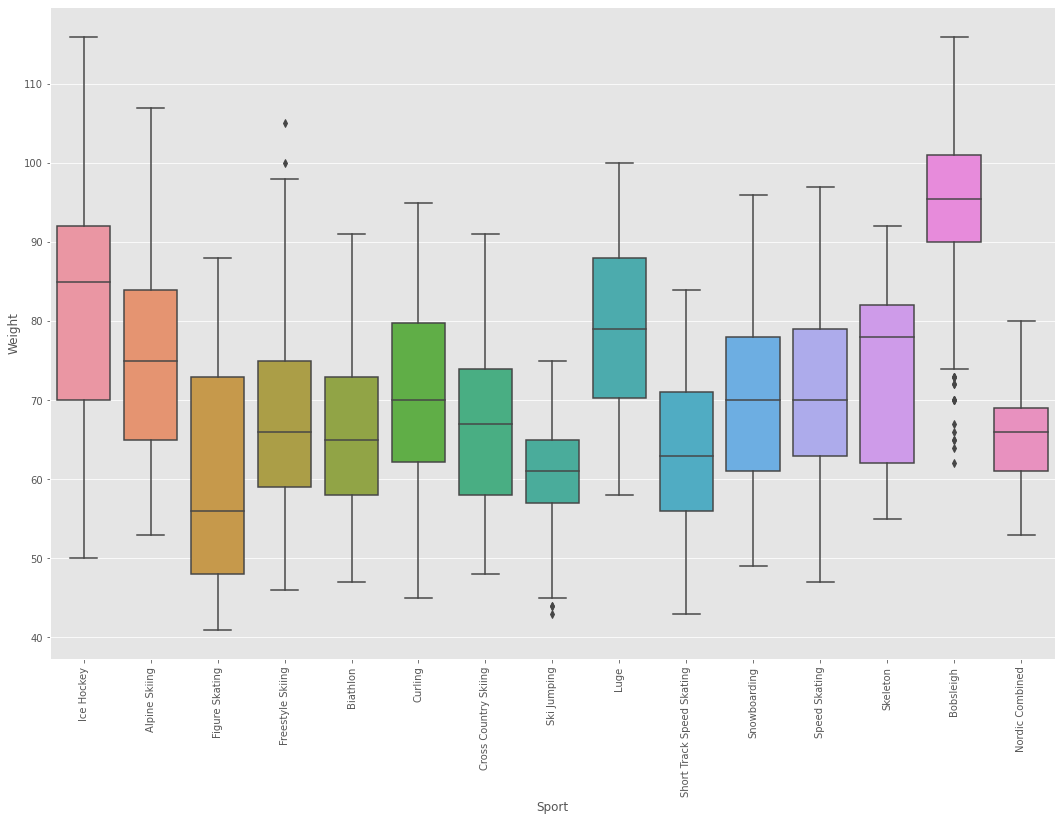

In [37]:
query = """
SELECT 
    Sport,
    NOC,
    Weight,
    Height
FROM df
WHERE Season = 'Winter' AND Year = 2014
"""
new_df = pysqldf(query)
plt.figure(figsize=(18,12))
sns.boxplot(data=new_df, x='Sport', y='Weight')
plt.xticks(rotation=90);

### Number of Athletes Competing over Time

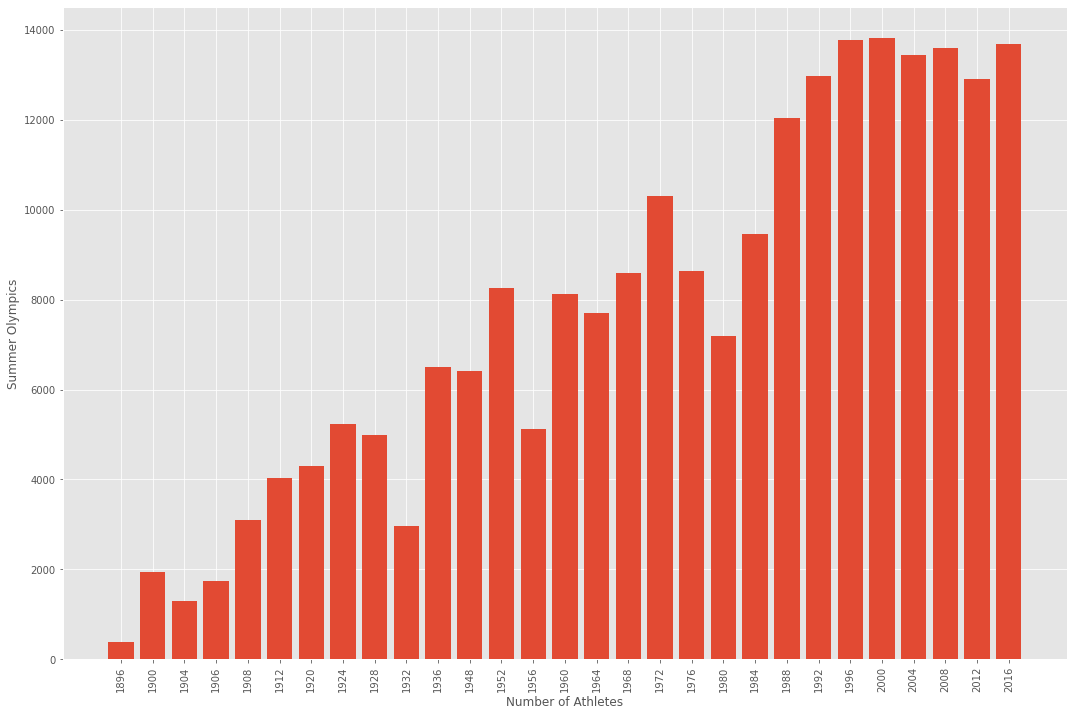

In [62]:
sql = """
SELECT year, COUNT(*) AS num_athletes FROM olympics
WHERE season = 'Summer'
GROUP BY year
"""
df = sqlio.read_sql_query(sql, conn)
# df
plt.figure(figsize=(18,12))
plt.bar(df['year'].astype(str), df['num_athletes'])
plt.ylabel('Summer Olympics')
plt.xlabel('Number of Athletes')
plt.xticks(rotation=90);

### Most Popular Sports by Number of Athletes

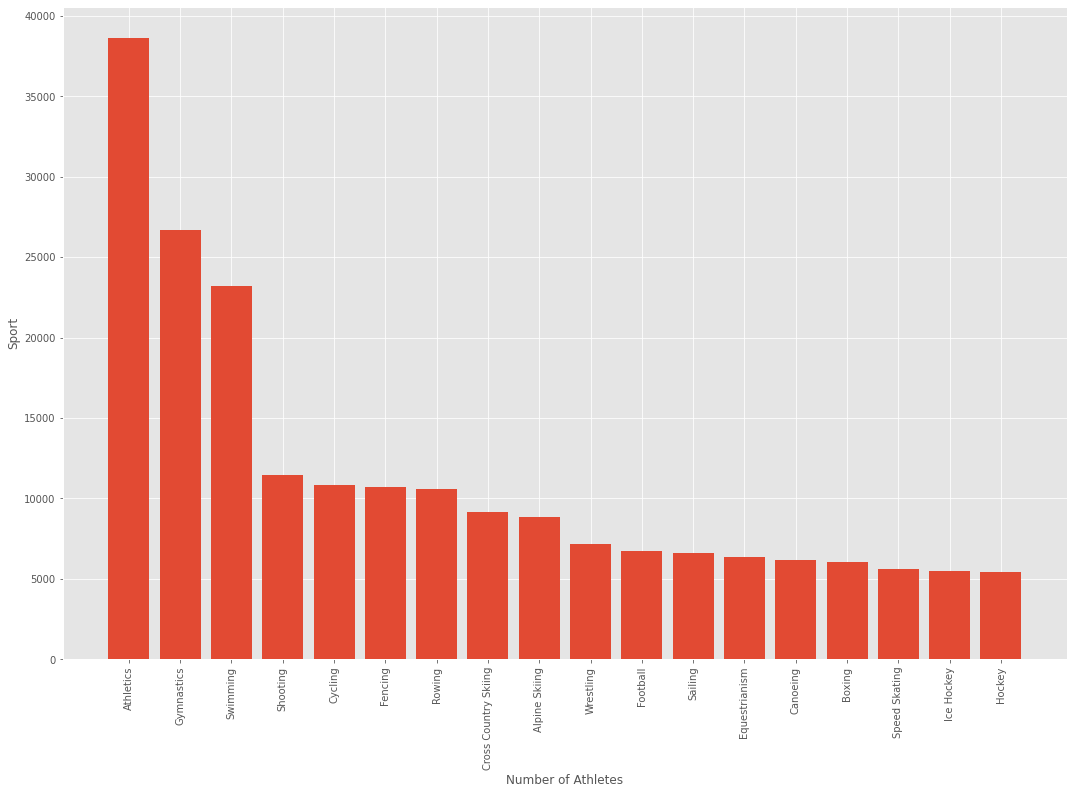

In [71]:
sql = """
SELECT sport, COUNT(*) AS num_athletes FROM olympics
GROUP BY sport
HAVING COUNT(*) > 5000
ORDER BY COUNT(*) DESC
"""
df = sqlio.read_sql_query(sql, conn)
# df
plt.figure(figsize=(18,12))
plt.bar(df['sport'], df['num_athletes'])
plt.ylabel('Sport')
plt.xlabel('Number of Athletes')
plt.xticks(rotation=90);

### Average Gymnast Body Type

In [107]:
# shortest gymnasts
sql = """
SELECT DISTINCT name, CAST(height AS INTEGER), CAST(weight AS DECIMAL), noc
FROM olympics
WHERE sport = 'Gymnastics' AND sex = 'F' AND height <> 'NA' AND weight <> 'NA'
ORDER BY height
LIMIT 10
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,height,weight,noc
0,Rosario Briones,127,42.0,MEX
1,Ana Olvido Manso Gallego,132,31.0,ESP
2,Flvia Lopes Saraiva,133,31.0,BRA
3,Choi Myong-Hui,135,25.0,PRK
4,Jana Labkov (-Valachov),135,34.0,TCH
5,Crystal Gilmore,136,47.0,CAN
6,Liubov Sheremeta,136,30.0,UKR
7,Lu Li,136,30.0,CHN
8,Mariya Yevgenyevna Filatova (-Kurbatova),136,30.0,URS
9,Claudia Fragapane,137,43.0,GBR


In [108]:
# tallest gymnasts
sql = """
SELECT DISTINCT name, CAST(height AS INTEGER), CAST(weight AS DECIMAL), noc
FROM olympics
WHERE sport = 'Gymnastics' AND sex = 'F' AND height <> 'NA' AND weight <> 'NA'
ORDER BY height DESC
LIMIT 10
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,height,weight,noc
0,Arja Vellamo Lehtinen (-Paatsalo),179,62.0,FIN
1,Agata Jadwiga Jaroszek-Karczmarek,178,61.0,POL
2,Bndicte Evrard,176,38.0,BEL
3,Fan Ye,176,72.0,CHN
4,"Sandra Marlene Ruddick (Anderson-, -John)",176,59.0,USA
5,Katarna arisk (-Mulders),174,44.0,TCH
6,Christine Schmitt (-Dressel),172,54.0,GDR
7,Salme Kaarina Koskinen (-Paimander),172,56.0,FIN
8,Marie-Sophie Hindermann,171,51.0,GER
9,Ute Starke (-Kahlenberg),171,49.0,GDR


In [104]:
# HEIGHT STATS
sql = """
SELECT MIN(CAST(height AS INTEGER)), ROUND(AVG(CAST(height AS INTEGER)), 2) AS avg, MAX(CAST(height AS INTEGER))
FROM olympics
WHERE sport = 'Gymnastics' AND sex = 'F' AND height <> 'NA'
"""
df = sqlio.read_sql_query(sql, conn)
df

,min,avg,max
0,127,156.14,179


In [106]:
# WEIGHT STATS
sql = """
SELECT MIN(CAST(weight AS DECIMAL)), ROUND(AVG(CAST(weight AS DECIMAL)), 2) AS avg, MAX(CAST(weight AS DECIMAL))
FROM olympics
WHERE sport = 'Gymnastics' AND sex = 'F' AND weight <> 'NA'
"""
df = sqlio.read_sql_query(sql, conn)
df

,min,avg,max
0,25.0,47.79,72.0


In [103]:
# AGE STATS
sql = """
SELECT MIN(CAST(age AS INTEGER)), ROUND(AVG(CAST(age AS INTEGER)), 2) AS avg, MAX(CAST(age AS INTEGER))
FROM olympics
WHERE sport = 'Gymnastics' AND sex = 'F' AND age <> 'NA'
"""
df = sqlio.read_sql_query(sql, conn)
df

,min,avg,max
0,11,19.23,41


<AxesSubplot:xlabel='year'>

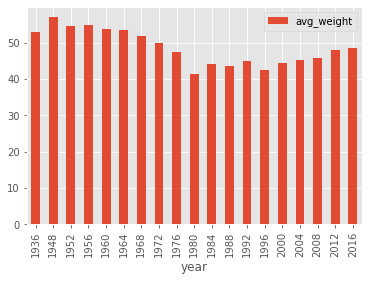

In [157]:
# WEIGHT STATS by Year
sql = """
SELECT year, ROUND(AVG(CAST(weight AS DECIMAL)), 2) AS avg_weight
FROM olympics
WHERE sport = 'Gymnastics' AND sex = 'F' AND weight <> 'NA'
GROUP BY year;
"""
df = sqlio.read_sql_query(sql, conn)
df.plot('year', 'avg_weight', kind='bar')

<AxesSubplot:xlabel='height', ylabel='weight'>

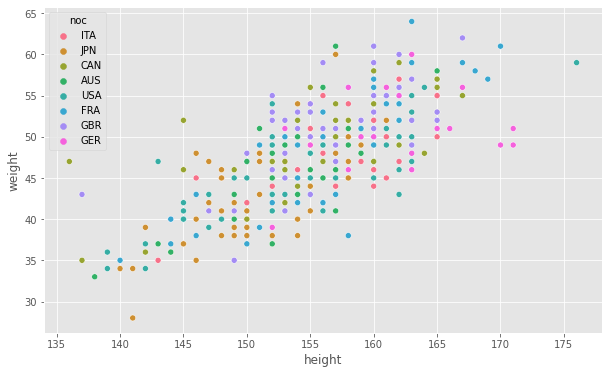

In [138]:
sql = """
SELECT DISTINCT name, CAST(height AS INTEGER), CAST(weight AS DECIMAL), noc
FROM olympics
WHERE sport = 'Gymnastics' AND sex = 'F' AND height <> 'NA' AND weight <> 'NA' 
AND noc IN
(SELECT noc FROM olympics
GROUP BY noc
ORDER BY COUNT(DISTINCT name) DESC
LIMIT 8)
"""
df = sqlio.read_sql_query(sql, conn)
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='height', y='weight', hue='noc')
# plt.show()
# df.plot('height', 'weight', kind='scatter', figsize=(10,6))

<AxesSubplot:xlabel='age'>

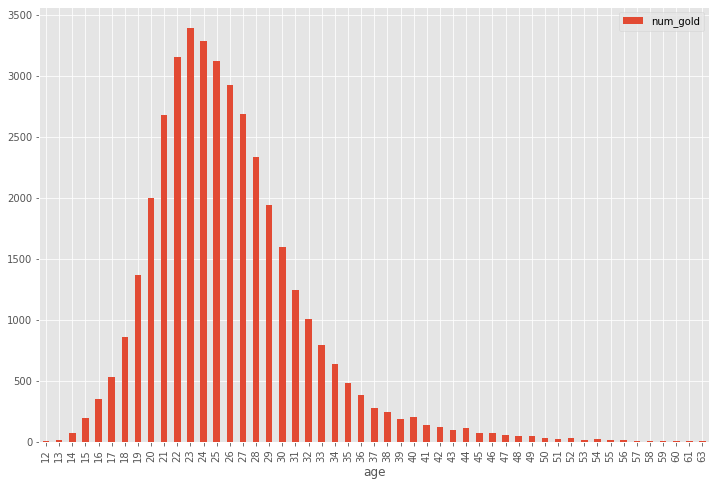

In [215]:
# Age Distribution of Olympic Medalists
sql = """
SELECT age, SUM(CASE medal
            WHEN 'Gold' THEN 1
            WHEN 'Silver' THEN 1
            WHEN 'Bronze' THEN 1
            ELSE 0
            END) AS num_gold
FROM olympics
WHERE age <> 'NA'
GROUP BY age
HAVING SUM(CASE medal
            WHEN 'Gold' THEN 1
            WHEN 'Silver' THEN 1
            WHEN 'Bronze' THEN 1
            ELSE 0
            END) > 3
"""
df = sqlio.read_sql_query(sql, conn)
df['age'] = df['age'].astype(int)
df.plot('age', 'num_gold', kind='bar', figsize=(12,8))

In [181]:
sql = """
SELECT
  name, noc, sport, SUM(CASE medal
             WHEN 'Gold' THEN 3
             WHEN 'Silver' THEN 2
             WHEN 'Bronze' THEN 1
             ELSE 0
             END)
FROM 
  olympics
GROUP BY 
  name, noc, sport
ORDER BY sum DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,noc,sport,sum
0,"Michael Fred Phelps, II",USA,Swimming,77
1,Larysa Semenivna Latynina (Diriy-),URS,Gymnastics,41
2,Nikolay Yefimovich Andrianov,URS,Gymnastics,34
3,Paavo Johannes Nurmi,FIN,Athletics,33
4,Ole Einar Bjrndalen,NOR,Biathlon,33
5,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",USA,Swimming,31
6,Borys Anfiyanovych Shakhlin,URS,Gymnastics,31
7,Sawao Kato,JPN,Gymnastics,31
8,"Raymond Clarence ""Ray"" Ewry",USA,Athletics,30
9,Edoardo Mangiarotti,ITA,Fencing,30


In [182]:
sql = """
SELECT
  name, sport, SUM(CASE medal
             WHEN 'Gold' THEN 3
             WHEN 'Silver' THEN 2
             WHEN 'Bronze' THEN 1
             ELSE 0
             END)
FROM 
  olympics
WHERE 
    noc = 'USA'
GROUP BY 
  name, sport
ORDER BY sum DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,sport,sum
0,"Michael Fred Phelps, II",Swimming,77
1,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,31
2,Mark Andrew Spitz,Swimming,30
3,"Raymond Clarence ""Ray"" Ewry",Athletics,30
4,"Frederick Carlton ""Carl"" Lewis",Athletics,29
5,"Matthew Nicholas ""Matt"" Biondi",Swimming,29
6,Ryan Steven Lochte,Swimming,27
7,Carl Townsend Osburn,Shooting,25
8,Allyson Michelle Felix,Athletics,24
9,"Dara Grace Torres (-Hoffman, -Minas)",Swimming,24


In [188]:
sql = """
SELECT
  name, noc, sport, COUNT(CASE medal
             WHEN 'Gold' THEN 1
             WHEN 'Silver' THEN 1
             WHEN 'Bronze' THEN 1
             ELSE 0
             END) AS num_medals
FROM 
  olympics
GROUP BY 
  name, noc, sport
ORDER BY num_medals DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,noc,sport,num_medals
0,Robert Tait McKenzie,CAN,Art Competitions,58
1,Heikki Ilmari Savolainen,FIN,Gymnastics,39
2,"Joseph ""Josy"" Stoffel",LUX,Gymnastics,38
3,Ioannis Theofilakis,GRE,Shooting,36
4,Alexandros Theofilakis,GRE,Shooting,32
5,Takashi Ono,JPN,Gymnastics,32
6,Jean Lucien Nicolas Jacoby,LUX,Art Competitions,32
7,Michel Mathiot,FRA,Gymnastics,31
8,"Johann ""Hans"" Sauter",AUT,Gymnastics,31
9,"Alfred August ""Al"" Jochim",USA,Gymnastics,31


In [190]:
sql = """
SELECT
  name, noc, sport, 
             SUM(CASE medal
                WHEN 'Gold' THEN 1
                ELSE 0
                END) AS num_gold,
             SUM(CASE medal
                WHEN 'Silver' THEN 1
                ELSE 0
                END) AS num_silver,
            SUM(CASE medal
             WHEN 'Bronze' THEN 1
             ELSE 0
             END) AS num_bronze
FROM 
  olympics
WHERE sex = 'F'
GROUP BY 
  name, noc, sport
ORDER BY num_gold DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,noc,sport,num_gold,num_silver,num_bronze
0,Larysa Semenivna Latynina (Diriy-),URS,Gymnastics,9,5,4
1,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",USA,Swimming,8,3,1
2,Vra slavsk (-Odloilov),TCH,Gymnastics,7,4,0
3,Lidiya Pavlovna Skoblikova (-Polozkova),URS,Speed Skating,6,0,0
4,Isabelle Regina Werth,GER,Equestrianism,6,4,0
5,Maria Valentina Vezzali,ITA,Fencing,6,1,2
6,Amy Deloris Van Dyken (-Rouen),USA,Swimming,6,0,0
7,Marit Bjrgen,NOR,Cross Country Skiing,6,3,1
8,Allyson Michelle Felix,USA,Athletics,6,3,0
9,Kristin Otto,GDR,Swimming,6,0,0


In [191]:
sql = """
SELECT
  name, noc, sport, 
             SUM(CASE medal
                WHEN 'Gold' THEN 1
                ELSE 0
                END) AS num_gold,
             SUM(CASE medal
                WHEN 'Silver' THEN 1
                ELSE 0
                END) AS num_silver,
            SUM(CASE medal
             WHEN 'Bronze' THEN 1
             ELSE 0
             END) AS num_bronze
FROM 
  olympics
WHERE sex = 'M'
GROUP BY 
  name, noc, sport
ORDER BY num_gold DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,noc,sport,num_gold,num_silver,num_bronze
0,"Michael Fred Phelps, II",USA,Swimming,23,3,2
1,"Raymond Clarence ""Ray"" Ewry",USA,Athletics,10,0,0
2,"Frederick Carlton ""Carl"" Lewis",USA,Athletics,9,1,0
3,Mark Andrew Spitz,USA,Swimming,9,1,1
4,Paavo Johannes Nurmi,FIN,Athletics,9,3,0
5,Sawao Kato,JPN,Gymnastics,8,3,1
6,Ole Einar Bjrndalen,NOR,Biathlon,8,4,1
7,"Matthew Nicholas ""Matt"" Biondi",USA,Swimming,8,2,1
8,Usain St. Leo Bolt,JAM,Athletics,8,0,0
9,Aladr Gerevich (-Gerei),HUN,Fencing,7,1,2


In [146]:
# OLYMPIC DOMINANCE
sql = """
SELECT
  noc, sport, SUM(CASE medal
             WHEN 'Gold' THEN 3
             WHEN 'Silver' THEN 2
             WHEN 'Bronze' THEN 1
             ELSE 0
             END)
FROM 
  olympics
GROUP BY 
  sport, 
  noc
ORDER BY sum DESC
LIMIT 15;
"""
df = sqlio.read_sql_query(sql, conn)
df

,noc,sport,sum
0,USA,Swimming,2630
1,USA,Athletics,2481
2,USA,Basketball,927
3,CAN,Ice Hockey,881
4,USA,Rowing,848
5,AUS,Swimming,799
6,ITA,Fencing,797
7,URS,Gymnastics,669
8,FRA,Fencing,660
9,GBR,Athletics,627


<AxesSubplot:xlabel='year'>

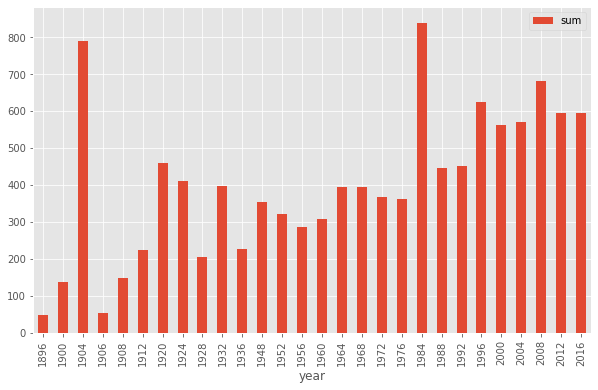

In [166]:
sql = """
SELECT year, SUM(CASE medal
             WHEN 'Gold' THEN 3
             WHEN 'Silver' THEN 2
             WHEN 'Bronze' THEN 1
             ELSE 0
             END)
FROM olympics
WHERE noc = 'USA' and season = 'Summer'
GROUP BY year;
"""
df = sqlio.read_sql_query(sql, conn)
df.plot('year', 'sum', kind='bar', figsize=(10, 6))

<AxesSubplot:xlabel='sport'>

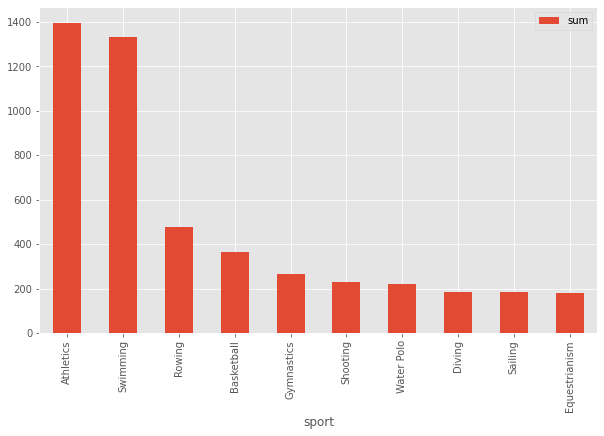

In [179]:
sql = """
SELECT sport, SUM(CASE medal
             WHEN 'Gold' THEN 1
             WHEN 'Silver' THEN 2
             WHEN 'Bronze' THEN 1
             ELSE 0
             END)
FROM olympics
WHERE noc = 'USA' and season = 'Summer'
GROUP BY sport
ORDER BY sum DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df.plot('sport', 'sum', kind='bar', figsize=(10, 6))

<AxesSubplot:xlabel='sport'>

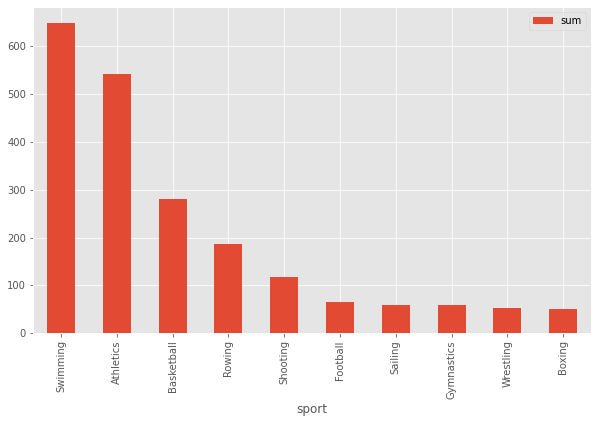

In [180]:
sql = """
SELECT sport, SUM(CASE medal
             WHEN 'Gold' THEN 1
             ELSE 0
             END)
FROM olympics
WHERE noc = 'USA' and season = 'Summer'
GROUP BY sport
ORDER BY sum DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df.plot('sport', 'sum', kind='bar', figsize=(10, 6))

In [ ]:
# Close communication with the database
conn.close()